In [1]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols, init_printing
import numpy as np
init_printing() # Para visualizar símbolos

## 1.1 Marcos de referencia y sistemas de coordenadas

In [2]:
# Definimos marcos de referencia con sympy.physics.mechanics
a=ReferenceFrame('A')
b=ReferenceFrame('B')
c=ReferenceFrame('C')

In [3]:
# Cada marco de referencia automaticamente define un sistema de coordenadas.
# Observe que la notación en sympy es x,y,z en vez de 1,2,3.
# Podemos verificar la definición de los vectores unitarios con el producto cruz (pag 2.) 
c.z.cross(c.x)

## 1.2 Variables de movimiento

In [4]:
#Para el ejemplo de la atracción de parque (Figura 3) en vez de definir los marcos de referencia
# por separado podemos utilizar cada marco de referencia para definir el siguiente y vincularlos 
# a través de una rotación relativa, definida por las variables de movimiento (q1,q2,q3).

# Definimos primero el marco A (base de la atracción)
a=ReferenceFrame('A')
# Ahora los symbolos para las variables de movimiento
q1,q2=symbols('q1,q2')
# Definimos b rotando q1 respecto a a.x
b=a.orientnew('B','Axis',(q1,a.x))
# Definimos c rotando q2 respecto a b.z
c=b.orientnew('C','Axis',(q2,b.z))

# De esta manera quedan definidas las coordenadas como propone el ejemplo. Esto lo podemos verificar
# facilmente:
print(a.x==b.x) #True
print(c.z==c.z) #True 
print(a.x==b.y) #False


True
True
False


## 1.3 Derivadas de vectores 

In [5]:
# Implemente el robot SCARA de la Figura 4:
# Defina los símbolos para las variables de movimiento
q1,q2,q3=symbols('q1,q2,q3')
# Defina los marcos de referencia para cada parte A B C A
a=ReferenceFrame('A')
# Defina b rotando q1 respecto a a.z
b=a.orientnew('B','Axis',(q1,a.z))
# Defina c rotando q2 respecto a b.z
c=b.orientnew('C','Axis',(q2,b.z))
# No necesita definir D, ya que tiene la misma orientación de C
 
# Luega defina cada punto usando los sistemas de coordenadas
# Primero el Origen O
O=Point('O') 
# El Punto P en la base del hombro esta a una distancia l1 en el eje a.z
l1,l2,l3=symbols('l1,l2,l3')
P=O.locatenew('P',l1*a.z)
Q=P.locatenew('Q',l2*b.x)
R=Q.locatenew('R',l3*c.x)
S=R.locatenew('S',q3*c.z)



In [6]:
#Ahora encuentre la posición del punto O al punto S
v=S.pos_from(O)
v

In [7]:
# Y la posición del punto Q al punto S
w=S.pos_from(Q)
w

In [8]:
# Si se calcula la derivada en el marco de referencia B
w.diff(q1,b)

In [9]:
# Si se calcula la derivada en el marco de referencia A
w.diff(q1,a)

## 1.4 Derivadas parciales

In [10]:
# Ejemplo modelo simplificado de una pierna

# Defina los símbolos para las variables de movimiento
q1,q2,q3,q4=symbols('q1,q2,q3,q4')

# Se definen marcos de referencia para cada parte A B C D
a=ReferenceFrame('A')

# Aqui un comentario para aclarar esta seccion:
# Segun el ejemplo del libro q1 es rotacion en a1(ax) y luego q2 es rotacion en y.
# La figura 5 puede no ser muy clara por si sola hasta que no se revisa el eje intermedio e (figura 6) y se entiende
# que las rotaciones q1 y q2  son flexión/extensión (q1) y abducción/adducción (q2) de la cadera.
# Teniendo en cuenta esto, se define también el marco de referencia intermedio "E" para mayor claridad.
# Aunque se podría realizar directamente la definición del marco b asi: 
# b=a.orientnew('B','Body',(q1,q2,0),'XYZ') 

# Defina e rotando q1 en a.x
e=a.orientnew('E','Axis',(q1,a.x))
# Defina b rotando q2 en e.y
b=e.orientnew('B','Axis',(q2,e.y))
# Defina c rotando q3 en b.z
c=b.orientnew('C','Axis',(q3,b.x))
# Defina D rotando q4 en c.x
d=c.orientnew('D','Axis',(q4,-c.x))

# Luega defina cada punto usando los sistemas de coordenadas
# Primero el Origen O en la pelvis
O=Point('O') 
l1,l2,l3,l4,l5,l6,l7,l8=symbols('l1,l2,l3,l4,l5,l6,l7,l8') # variables de distancia
origen_b=O.locatenew('P',-l1*a.x+l2*a.y-l3*b.x-l4*b.y)
rodilla=origen_b.locatenew('Q',-l5*b.z)
origen_c=rodilla.locatenew('R',-l6*c.z)
origen_d=origen_c.locatenew('S',-l7*d.z-l8*d.y)

# Ahora calcule los vectores
u=origen_d.pos_from(rodilla) # rodilla hasta punta del pie
v=origen_c.pos_from(origen_b) # cadera hasta tobillo
w=rodilla.pos_from(O) # pelvis hasta rodilla

In [11]:
# Tabla 1. Cambio en los vectores en los marcos de referencia
tables=dict()
for frame in [a,b,c,d]:
    tbl=np.zeros((4,3),dtype=bool)
    for j,vec in enumerate([u,v,w]):
        for i,coord in enumerate([q1,q2,q3,q4]):            
            tbl[i,j]=not(vec.diff(coord,frame)==0)
    tables[frame.name]=tbl        

In [12]:
# Confirmando los resultados de la tabla 1.
tables

{'A': array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True, False],
        [ True, False, False]]),
 'B': array([[False, False,  True],
        [False, False,  True],
        [ True,  True, False],
        [ True, False, False]]),
 'C': array([[False, False,  True],
        [False, False,  True],
        [False,  True,  True],
        [ True, False, False]]),
 'D': array([[False, False,  True],
        [False, False,  True],
        [False,  True,  True],
        [ True,  True,  True]])}

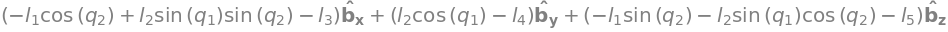

In [13]:
# Puede utilizar el metodo express para expresar cualquier vector en el
# marco de referencia deseado y verificar si contiene terminos qi.
w.express(b)

In [14]:
# Tambien puede utilizar el metodo express para establecer las relaciones
# entre vectores unitarios de la figura 6.
d.y.express(c)

In [15]:
# Y por supuesto calcular derivadas parciales de estos vectores
d.y.diff(q4,c).simplify()

In [16]:
# Puede verificar todas las derivadas parciales del ejemplo
b.x.diff(q2,a).simplify()
#b.y.diff(q2,a).simplify()
#b.z.diff(q2,a).simplify()
#a.x.diff(q1,b).simplify()
#a.y.diff(q1,b).simplify()
#a.z.diff(q1,b).simplify()


## 1.5 Derivada total

In [17]:
# Se utiliza el modelo simplificado de una pierna con una simplificación 
# adicional: espesor 0. 

# Se definen las variables de movimiento.
# Como se quiere encontrar la derivada total (derivada respecto al tiempo), en este caso
# se utilizan simbolos dinamicos para las variables de movimiento. (q1(t), q2(t), etc.)
q1,q2,q3,q4=dynamicsymbols('q1,q2,q3,q4')

# Los marcos se mantienen igual, pero podemos simplificar la definción y eliminar
# el marco intermedio E, al usar b orientado con rotaciones sucesivas ('Body').
# Se definen marcos de referencia para cada parte A B C D
a=ReferenceFrame('A')
# Defina b rotando sucesivamente en x (ax) y luego en y (ey).
b=a.orientnew('B','Body',(q1,q2,0),'XYZ') 
# Defina c rotando q3 en b.z
c=b.orientnew('C','Axis',(q3,b.x))
# Defina D rotando q4 en c.x
d=c.orientnew('D','Axis',(q4,-c.x))

# Luega defina cada punto usando los sistemas de coordenadas
# Primero el Origen O en la pelvis
O=Point('O') 
la,lb,lc,ld=symbols('la,lb,lc,ld') # variables de distancia
origen_b=O.locatenew('P',-la*a.x)
rodilla=origen_b.locatenew('Q',-lb*b.z)
origen_c=rodilla.locatenew('R',-lc*c.z)
origen_d=origen_c.locatenew('S',-ld*d.y)

# Ahora calcule los vectores
u=origen_d.pos_from(rodilla) # rodilla hasta punta del pie
v=origen_c.pos_from(origen_b) # cadera hasta tobillo
w=rodilla.pos_from(O) # pelvis hasta rodilla

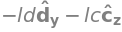

In [18]:
# Puede verificar los vectores 
u # rodilla hasta punta del pie
# v # cadera hasta tobillo
# w # pelvis hasta rodilla

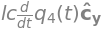

In [19]:
# Puede calcular las derivadas totales
u.dt(d) # derivada du/dt en el marco D
#v.dt(d).express(c) # derivada dv/dt en el marco D expresadas en coordenadas c
#w.dt(a) # derivada dw/dt en el marco A 

## 1.6 Matrices de rotacion

In [20]:
# Defina un marco de referencia A
a=ReferenceFrame('A')
# Defina el símbolo theta para el angulo de rotación
theta=symbols('theta')
# Defina un marco de referencia B aplicando una rotación en ax.
b=a.orientnew('B','Axis',(theta,a.x))
# Puede expresar vectores definidos con componentes en b. Por ejemplo:
b1,b2,b3=symbols('b1,b2,b3')
vec1=b1*b.x+b2*b.y+b3*b.z # Vector vec1 definido por componentes b1 en bx, b2 en by, b3, en bz.

# Observe que pasa cuando expresa el vector en el sistema de coordenadas de A
vec1.express(a)
#vec1.express(b)

## 1.7 Cosenos directores

In [21]:
# Defina un marco de referencia A
a=ReferenceFrame('A')
# Defina el símbolo theta para el ángulo de rotación
theta=symbols('theta')
# Ahora defina un marco de referencia B con con diferentes rotaciones.
b=a.orientnew('B','Axis',(theta,a.x))
print('en x:')
pprint(a.dcm(b))
b=a.orientnew('B','Axis',(theta,a.y))
print('en y:')
pprint(a.dcm(b))
b=a.orientnew('B','Axis',(theta,a.z))
print('en z:')
pprint(a.dcm(b))

en x:
⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦
en y:
⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦
en z:
⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦


## 1.8 Diádicas de vectores

In [22]:
# Puede construir diádicas utilizando el método outer (producto diádico)
from sympy.physics.mechanics import outer,dot 
A=outer(a.x,a.x)+outer(a.y,a.y)+outer(a.z,a.z)
A # Diádica A

In [23]:
#Calule el producto A.b 
A.dot(b1*b.x+b2*b.y+b3*b.z)